import and basic data cleaning and basic EDA without visualisation

In [1]:
'''!pip uninstall nltk
!pip install nltk'''

'!pip uninstall nltk\n!pip install nltk'

In [ ]:
# basic modules
import numpy as np
import pandas as pd
# data preprocessing module import
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

  # train- test - split
from numpy import strings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
  # KNN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
  #SVM
from sklearn.svm import LinearSVC
  # Multinomial NB
from sklearn.naive_bayes import MultinomialNB
  #decision tree
from sklearn.tree import DecisionTreeClassifier
 # New input test segment
# !pip install googletrans==4.0.0-rc1
 # accuracy
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=d1a61cfb7d81ce72d989e389ee19c557fffa9459091d07e15b015c43e868aeab
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [3]:
# loading the data
df= pd.read_csv("/content/Twitter_Data.csv")

In [4]:
# for first a few values of the data
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
# checking the shape of the data
df.groupby('category').describe()

clean_text                                                            \
              count unique                                                top   
category                                                                        
-1.0          12685  12685  are with modi and modi with and you are useles...   
 0.0          19801  19801                          why would act helps modi    
 1.0          25365  25365  during before announced feat scientists today ...   

               
         freq  
category       
-1.0        1  
 0.0        1  
 1.0        1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57853 entries, 0 to 57852
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  57852 non-null  object 
 1   category    57852 non-null  float64
dtypes: float64(1), object(1)
memory usage: 904.1+ KB


In [7]:
# checking for missing value
df.isnull()
df_clean=df.dropna(axis = 0)
df_clean.info()
df.tail()
df_clean.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 57851 entries, 0 to 57851
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  57851 non-null  object 
 1   category    57851 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


,clean_text,category
57847,indias not well known space program another od...,0.0
57848,and clarify you ardent karyakarta for trs when...,0.0
57849,during before announced feat scientists today ...,1.0
57850,why would act helps modi,0.0
57851,are with modi and modi with and you are useles...,-1.0


In [8]:
# dealing with missing values
df.isnull().sum()
df_clean1 = df.dropna(subset=['clean_text', 'category'])
df_clean1.isnull().sum()
df_clean1.info()
df.shape
df_clean1.shape

<class 'pandas.core.frame.DataFrame'>
Index: 57851 entries, 0 to 57851
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  57851 non-null  object 
 1   category    57851 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


(57851, 2)

DATA PREPROCESSING #ARGHYA

In [9]:
#lowercasing
df_clean1['clean_text'].str.lower()

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
57847,indias not well known space program another od...
57848,and clarify you ardent karyakarta for trs when...
57849,during before announced feat scientists today ...
57850,why would act helps modi


In [10]:
# reomoving HTML tags
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)
df1=df_clean1
df1

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
57847,indias not well known space program another od...,0.0
57848,and clarify you ardent karyakarta for trs when...,0.0
57849,during before announced feat scientists today ...,1.0
57850,why would act helps modi,0.0


In [11]:
# applying function
df1['clean_text'].apply(remove_html_tags)

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
57847,indias not well known space program another od...
57848,and clarify you ardent karyakarta for trs when...
57849,during before announced feat scientists today ...
57850,why would act helps modi


In [12]:
#removing url
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)
df1['clean_text'].apply(remove_url)

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
57847,indias not well known space program another od...
57848,and clarify you ardent karyakarta for trs when...
57849,during before announced feat scientists today ...
57850,why would act helps modi


In [13]:
chat_words = {
    "AFAIK": "as far as I know",
    "AFK": "away from keyboard",
    "ASAP": "as soon as possible",
    "ATM": "at the moment",
    "B2W": "back to work",
    "B4": "before",
    "BBL": "be back later",
    "BBS": "be back soon",
    "BF": "boyfriend",
    "BFF": "best friends forever",
    "BRB": "be right back",
    "BTW": "by the way",
    "CMB": "call me back",
    "CMIIW": "correct me if I'm wrong",
    "CU": "see you",
    "CUL8R": "see you later",
    "CYA": "see ya",
    "DIY": "do it yourself",
    "DM": "direct message",
    "F2F": "face-to-face",
    "FAQ": "frequently asked questions",
    "FB": "Facebook",
    "FOMO": "fear of missing out",
    "FTW": "for the win",
    "FYEO": "for your eyes only",
    "FYI": "for your information",
    "GA": "go ahead",
    "GB": "goodbye",
    "GF": "girlfriend",
    "GG": "good game",
    "GL": "good luck",
    "GR8": "great",
    "GTG": "got to go",
    "HAGD": "have a good day",
    "HBD": "happy birthday",
    "HMU": "hit me up",
    "HTH": "hope this helps",
    "IDK": "I don't know",
    "IKR": "I know, right?",
    "ILY": "I love you",
    "IMHO": "in my humble opinion",
    "IMO": "in my opinion",
    "IRL": "in real life",
    "ISO": "in search of",
    "IOW": "in other words",
    "IYKYK": "if you know, you know",
    "JIC": "just in case",
    "JK": "just kidding",
    "JW": "just wondering",
    "K": "okay",
    "KK": "okay okay",
    "L8R": "later",
    "LMAO": "laughing my ass off",
    "LMK": "let me know",
    "LOL": "laughing out loud",
    "LTNS": "long time no see",
    "MCM": "man crush monday",
    "MFW": "my face when",
    "MSG": "message",
    "MYOB": "mind your own business",
    "N/A": "not applicable",
    "NBD": "no big deal",
    "NGL": "not gonna lie",
    "NM": "never mind",
    "NP": "no problem",
    "NSFW": "not safe for work",
    "NVM": "never mind",
    "OIC": "oh, I see",
    "OMG": "oh my god/gosh",
    "OMW": "on my way",
    "OOTD": "outfit of the day",
    "OT": "off-topic",
    "POV": "point of view",
    "PSA": "public service announcement",
    "ROFL": "rolling on the floor laughing",
    "RN": "right now",
    "RSVP": "répondez s'il vous plaît (please respond)",
    "SMH": "shaking my head",
    "SNS": "social networking service",
    "SO": "significant other",
    "SRY": "sorry",
    "STFU": "shut the f*** up",
    "SU": "shut up",
    "SWAK": "sealed with a kiss",
    "TBH": "to be honest",
    "TBD": "to be decided",
    "TBF": "to be frank",
    "TFTI": "thanks for the info",
    "TGIF": "thank goodness it's Friday",
    "THX": "thanks",
    "TIA": "thanks in advance",
    "TIL": "today I learned",
    "TL;DR": "too long; didn't read",
    "TLC": "tender loving care",
    "TMI": "too much information",
    "TMRW": "tomorrow",
    "TTFN": "ta-ta for now",
    "TTYL": "talk to you later",
    "TY": "thank you",
    "TYVM": "thank you very much",
    "U": "you",
    "UR": "your/you're",
    "V": "very",
    "WCW": "woman crush wednesday",
    "WDYM": "what do you mean?",
    "WFM": "works for me",
    "WTH": "what the hell?",
    "WTF": "what the f***?",
    "WU": "what's up?",
    "WUWTA": "what do you want to talk about?",
    "WYD": "what are you doing?",
    "WYWH": "wish you were here",
    "XOXO": "hugs and kisses",
    "Y": "why?",
    "YOLO": "you only live once",
    "YW": "you're welcome",
    "ZOMG": "oh my god (with extra emphasis)",
    "ZZZ": "sleeping/bored/tired",
}

In [14]:
# chat word treatment
def chat_conversion(text, chat_words_diction):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_diction:
            new_text.append(chat_words_diction[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)
df1['clean_text'].apply(lambda x: chat_conversion(x,chat_words))

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp to...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
57847,indias not well known space program another od...
57848,and clarify you ardent karyakarta for trs when...
57849,during before announced feat scientists today ...
57850,why would act helps modi


In [15]:
#stopwords treatment
stopwords.words('english')
def remove_stops(text):
  new_text = []
  for i in text.split():
    if i in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(i)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
df1['clean_text'].apply(remove_stops)

,clean_text
0,
1,talk
2,
3,asking
4,answer
...,...
57847,indias
57848,
57849,
57850,


In [16]:
#emoji treatment
def remove_emojis(text):
    """Removes emojis from a string."""
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)
df1['clean_text'].apply(remove_emojis)

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
57847,indias not well known space program another od...
57848,and clarify you ardent karyakarta for trs when...
57849,during before announced feat scientists today ...
57850,why would act helps modi



TOKENISATION

In [17]:
# TOKENISATION WITH NLTK
!pip install nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def nltk_tokenizer(text):
  if isinstance(text, str):
    return word_tokenize(text)
  elif pd.isna(text):
    return [] # for NAN values
  else:
    return [] # for other non string values
df1['nltk_tokens'] = df1['clean_text'].apply(nltk_tokenizer)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-17-7ceb9a8ba8a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nltk_tokens'] = df1['clean_text'].apply(nltk_tokenizer)


TRAIN - TEST - SPLIT

In [18]:
def trainingtest():

    # Convert to NumPy arrays
    x = np.array(df1['nltk_tokens'])
    y = np.array(df1['category'])

    #cv=TfidfVectorizer() # Moved this to Linearaccuracy function

    # Join the list of words back into a single string for each document before fitting CountVectorizer
    x = [" ".join(doc) for doc in x]  # Join words in each list into a string

    # Apply TfidfVectorizer to transform the data
    #x_tf = cv.fit_transform(x) # This line transforms the data and is moved to Linearaccuracy
    # Now split the transformed data after applying the vectorizer in Linearaccuracy
    #x_train, x_test, y_train, y_test = train_test_split(x_tf, y, test_size=0.2, random_state=42)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Splitting the raw text data

    # Reshape x_train and x_test to 2D arrays
    # Check the shape of x_train and ensure it's not already 2D
    #if x_train.ndim == 1: # Removed as x_train is a list
    #    x_train = x_train.reshape(-1, 1)  # Reshape to a column vector

    #if x_test.ndim == 1: # Removed as x_test is a list
    #    x_test = x_test.reshape(-1, 1)  # Reshape to a column vector

    # Convert x_train and x_test to NumPy arrays if they are lists
    x_train = np.array(x_train)
    x_test = np.array(x_test)

    # Now reshape if necessary:
    if x_train.ndim == 1:
        x_train = x_train.reshape(-1, 1)  # Reshape to a column vector

    if x_test.ndim == 1:
        x_test = x_test.reshape(-1, 1)  # Reshape to a column vector


    return x_train,y_train,x_test,y_test


In [19]:
x_train,y_train,x_test,y_test=trainingtest()

**ALGORITHMS**

KNN

In [20]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np'''

# Convertion of list of tokens back to string
def knn_with_pca(df, n_components=50, n_neighbors=5, max_tfidf_features=1000):
    x = [" ".join(tokens) for tokens in df1['nltk_tokens']]
    y = df1['category'].values  # Changed to df1['category']

    # Splitting the data
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=42
    )

    # TF-IDF
    vectorizer_knn = TfidfVectorizer(max_features=max_tfidf_features)
    x_train_vec = vectorizer_knn.fit_transform(x_train)
    x_test_vec = vectorizer_knn.transform(x_test)

    # converting to dense
    x_train_dense = x_train_vec.toarray()
    x_test_dense = x_test_vec.toarray()

    # pca
    pca_knn = PCA(n_components=n_components, random_state=42)
    x_train_pca = pca_knn.fit_transform(x_train_dense)
    x_test_pca = pca_knn.transform(x_test_dense)

    # KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train_pca, y_train)
    y_pred = knn.predict(x_test_pca)

    # evaluation
    accuracy_knn = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_knn)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return knn, vectorizer_knn, pca_knn, accuracy_knn


In [21]:
model_knn, vectorizer_knn, pca_knn, accuracy_knn = knn_with_pca(df1) # Get accuracy
print("Returned Accuracy:", accuracy_knn) # Print the accuracy

Accuracy: 0.4788695877625097
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.32      0.36      0.34      2507
         0.0       0.48      0.60      0.54      3950
         1.0       0.58      0.45      0.50      5114

    accuracy                           0.48     11571
   macro avg       0.46      0.47      0.46     11571
weighted avg       0.49      0.48      0.48     11571

Returned Accuracy: 0.4788695877625097


In [22]:
    '''accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return knn, vectorizer, pca, accuracy
'''

'accuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\nprint("Classification Report:\n", classification_report(y_test, y_pred))\n\nreturn knn, vectorizer, pca, accuracy\n'

SVM


In [23]:
def LinearSVMaccuracy():
  x_train, y_train, x_test, y_test = trainingtest()

  # tokenised-> string
  x_train = [" ".join(tokens) for tokens in x_train]
  x_test = [" ".join(tokens) for tokens in x_test]

  # Vectorization
  vectorizer_svm = TfidfVectorizer()
  x_train_vec = vectorizer_svm.fit_transform(x_train)
  x_test_vec = vectorizer_svm.transform(x_test)

  # Training the model
  svm_model = LinearSVC(random_state=42)
  svm_model.fit(x_train_vec, y_train)
  y_pred = svm_model.predict(x_test_vec)

  # Evaluation
  accuracy_svm = accuracy_score(y_test, y_pred)
  print("Accuracy of LinearSVC:", accuracy_svm)
  print(classification_report(y_test, y_pred))

  # Return for plots
  return svm_model, vectorizer_svm, accuracy_svm

In [24]:
# model, vectorizer = LinearSVMaccuracy()
svm_model, vectorizer_svm, accuracy_svm = LinearSVMaccuracy()

Accuracy of LinearSVC: 0.927577564601158
              precision    recall  f1-score   support

        -1.0       0.90      0.84      0.87      2507
         0.0       0.93      0.97      0.95      3950
         1.0       0.94      0.93      0.94      5114

    accuracy                           0.93     11571
   macro avg       0.92      0.92      0.92     11571
weighted avg       0.93      0.93      0.93     11571



Multinomial Naive Bayes


In [25]:
def modelfitting():
    x_train, y_train, x_test, y_test = trainingtest()
    # Create a TfidfVectorizer object
    vectorizer_mnb = TfidfVectorizer()  # Changed variable name

    # Convert x_train and x_test to lists of strings if they are not
    x_train = [str(item) if not isinstance(item, str) else item for item in x_train]
    x_test = [str(item) if not isinstance(item, str) else item for item in x_test]

    # Fit the vectorizer to the training data and transform it
    x_train_vec = vectorizer_mnb.fit_transform(x_train)  # Changed variable name

    # Transform the testing data using the fitted vectorizer
    x_test_vec = vectorizer_mnb.transform(x_test)  # Changed variable name

    nb_model = MultinomialNB()
    nb_model.fit(x_train_vec, y_train)  # Fit using the transformed data

    y_pred = nb_model.predict(x_test_vec)  # Predict using the transformed data
    y_train_pred = nb_model.predict(x_train_vec)  # Predict on training data

    accuracy_mnb = accuracy_score(y_test, y_pred)  # Calculate accuracy, changed variable name
    print("Accuracy of MultinomialNB:", accuracy_mnb)
    print(classification_report(y_test, y_pred)) # Print Classification Report

    return nb_model, accuracy_mnb, vectorizer_mnb


In [26]:
nb_model, accuracy_nb, vectorizer_mnb = modelfitting() # Changed to capture all return values

Accuracy of MultinomialNB: 0.5601071644628813
              precision    recall  f1-score   support

        -1.0       0.97      0.08      0.15      2507
         0.0       0.89      0.31      0.46      3950
         1.0       0.51      0.99      0.67      5114

    accuracy                           0.56     11571
   macro avg       0.79      0.46      0.43     11571
weighted avg       0.74      0.56      0.49     11571



Decision Tree

In [27]:
def DecisionTreeAccuracy():
    x_train, y_train, x_test, y_test = trainingtest()

    # Convert the tokenized text in x_train and x_test to strings
    x_train_str = [" ".join(tokens) for tokens in x_train]
    x_test_str = [" ".join(tokens) for tokens in x_test]

    # Vectorize the text using TF-IDF
    vectorizer = TfidfVectorizer()
    x_train_vec = vectorizer.fit_transform(x_train_str)
    x_test_vec = vectorizer.transform(x_test_str)

    clf = DecisionTreeClassifier()
    clf = clf.fit(x_train_vec, y_train)
    y_pred = clf.predict(x_test_vec)
    accuracy_dt = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_dt)
    print("report:", classification_report(y_test, y_pred))
    return clf, accuracy_dt


In [28]:
clf, accuracy_dt = DecisionTreeAccuracy()

Accuracy: 0.8141042260824475
report:               precision    recall  f1-score   support

        -1.0       0.70      0.65      0.67      2507
         0.0       0.84      0.91      0.87      3950
         1.0       0.84      0.82      0.83      5114

    accuracy                           0.81     11571
   macro avg       0.79      0.79      0.79     11571
weighted avg       0.81      0.81      0.81     11571



Compare Accuracy

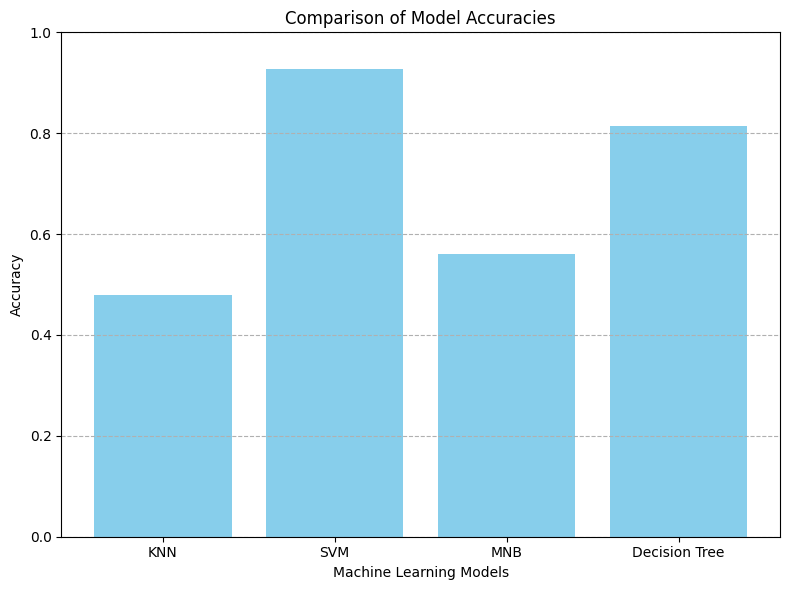

In [29]:
all_acc = {
    'KNN': accuracy_knn,
    'SVM': accuracy_svm,
    'MNB': accuracy_nb,
    'Decision Tree': accuracy_dt
}
models = list(all_acc.keys())
scores = list(all_acc.values())

plt.figure(figsize=(8, 6))
plt.bar(models, scores, color='skyblue')
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()